# Case I : Hypotheses Testing on Population Mean

- The population follows a normal distribution.
- Assume that you know the population variance $\sigma^{2}$.
- We can use a normal distribution by defining a z variable, $Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$
- We want to verify a null hypothesis on the population mean. 


- Null hypothesis : $\mu = 130$
- Alternative hypothesis : **$\mu \neq 130$(two-sided test)**
- Experiment: Choose 9 elements as your sample out of the population. 
- You got the sample average $\bar{x} = 131.75$.
- The population standard deviation $\sigma = 1.5$.

# Method 1. Use the rejection region

## Step 1. Set up the significance level $\alpha$

- $\alpha = 0.05$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
rv = norm(loc=0, scale=1) # standard normal distribution

## Step 2. Calculate the rejection region corresponding to the significance level.

- the significance level ($\alpha$) = the area of the rejection region = 0.05
- For the two-sided test, your rejection region consists of two parts, lower-sided one and upper-sided one. 
- Since the significance level is 0.05, each part of the rejection region is 0.025. 

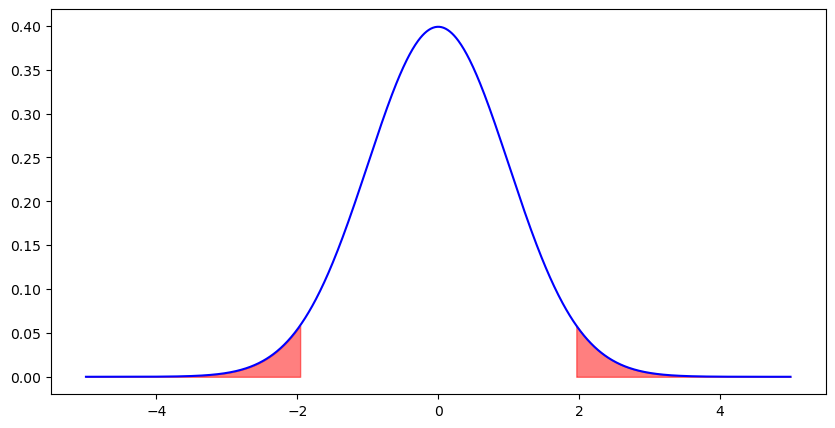

In [5]:
x = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, rv.ppf(0.025), 1000)
x2 = np.linspace(rv.ppf(0.975), 5,  1000)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(x, rv.pdf(x), color="blue")
ax.fill_between(x1, rv.pdf(x1), color="red", alpha=0.5)
ax.fill_between(x2, rv.pdf(x2), color="red", alpha=0.5)
plt.show()

In [6]:
rv.ppf(0.025), rv.ppf(0.975)

(-1.9599639845400545, 1.959963984540054)

- Rejection region = $(-\infty, -1.96)$ or $(1.96, \infty)$

## Step 3. Compare your test statistic with the rejection region

- The test statistic $\bar{x}=131.75$
- The corresponding z value is $\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$, where $\mu=130$ in the null hypothesis, $\sigma=1.5$, $n=9$

In [7]:
z = (131.75 - 130) / (1.5/np.sqrt(9))
print(z)

3.5


- 3.5 is inside the rejection region, because 1.96 < 3.5.
- Thus we reject the null hypothesis with the significance level 5%; we accept the alternative hypothesis.

# Method 2. Use P-value

## Step 1. Set up the significance level $\alpha$

- $\alpha = 0.05$

In [9]:
rv = norm(loc=0, scale=1) # standard normal distribution

## Step 2. Calculate P-value corresponding to a test statistic.

In [8]:
z = (131.75 - 130) / (1.5/np.sqrt(9))
print(z)

3.5


In [13]:
area = rv.cdf(z) # area from - infty to z
print(area, 1-area)
p_value = 1-area

0.9997673709209645 0.0002326290790355401


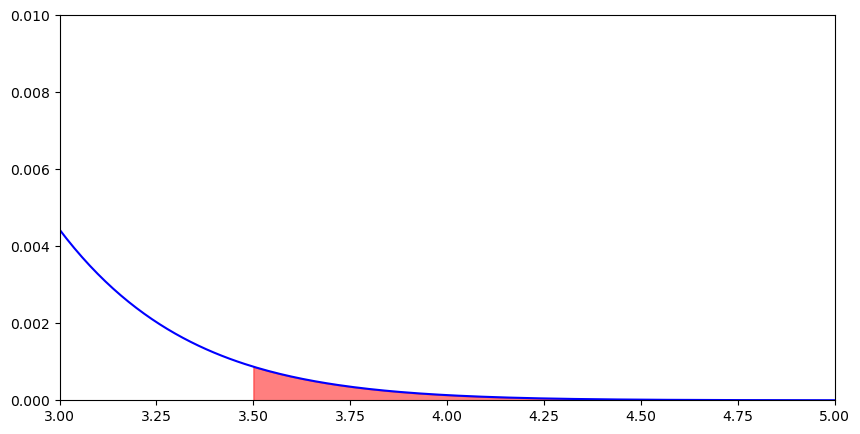

In [18]:
x = np.linspace(-5, 5, 1000)
x2 = np.linspace(z, 5,  1000)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(x, rv.pdf(x), color="blue")
ax.set_ylim(0,0.01)
ax.set_xlim(3,5)
ax.fill_between(x2, rv.pdf(x2), color="red", alpha=0.5)
plt.show()

## Step 3. Compare P-value and Significance level

- P-value = 0.00023262
- $\alpha$ = 0.05
- For the two-sided test of normal distribution, you need to compare P-value and a half of your significance level.
- That is because your rejection region is located at lower and upper sides equally.

- P-value = 0.00023262 vs $\alpha/2=0.025$
- $\alpha/2=0.025 $ > P-value: You can say that the test statistic is inside the rejection region, so you can reject the null hypothesis. 

# Case 2. Large Sample

- Here there is no assumption that the population follows the normal distribution. 
- Due to the Central Limit Theorem, your sample mean approximately follows the normal distribution. 
- You can use the above result to do hypotheses testing. 

In [19]:
data = [14.1, 14.5, 15.5, 16.0, 16.0, 16.7, 16.9, 17.1, 17.5, 17.8,
        17.8, 18.1, 18.2, 18.3, 18.3, 19.0, 19.2, 19.4, 20.0, 20.0,
        20.8, 20.8, 21.0, 21.5, 23.5, 27.5, 27.5, 28.0, 28.3, 30.0,
        30.0, 31.6, 31.7, 31.7, 32.5, 33.5, 33.9, 35.0, 35.0, 35.0,
        36.7, 40.0, 40.0, 41.3, 41.7, 47.5, 50.0, 51.0, 51.8, 54.4, 55.0, 57.0]

In [20]:
len(data)

52

- Null hypothesis : $\mu = 30$
- Alternative hypothesis : $\mu < 30$ (lower-tailed, lower-sided test)
- $n = 52$

# Method 1. Use the Rejection region

## Step 1. Set up the significance level 
- $\alpha=0.05$

In [21]:
rv = norm(loc=0, scale=1) # standard normal distribution

## Step 2. Calculate the rejection region corresponding to $\alpha$.

- Since you are doing the lower-tailed test, your rejection region whose area is $\alpha$ is located at the lower-sided of the standard normal distribution. 

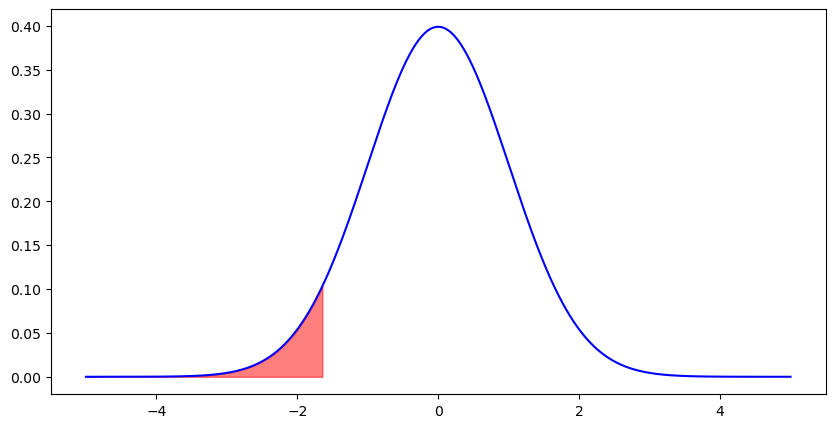

In [22]:
x = np.linspace(-5, 5, 1000)
x1 = np.linspace(-5, rv.ppf(0.05), 1000)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(x, rv.pdf(x), color="blue")
ax.fill_between(x1, rv.pdf(x1), color="red", alpha=0.5)
plt.show()

In [23]:
rv.ppf(0.05)

-1.6448536269514729

- The corresponding rejection region is $R=(-\infty, -1.645]$.

## Step 3. Calculate test statistic and compare with the rejection region. 

- $Z = \frac{\bar{x}-\mu}{S/\sqrt{n}}$

In [24]:
sample_mean = np.mean(data)
sample_std  = np.std(data, ddof=1) # Note ddof=1 for sample std. 

In [25]:
print(sample_mean, sample_std)

28.76153846153846 12.26469752704339


In [26]:
z = (sample_mean - 30) / (sample_std/np.sqrt(len(data)))
print(z)

-0.7281608975300251


- z (test statistic) is outside the rejection region. 
- Thus we can accept the null hypothesis, since $z \notin R$.

# Method 2. Use P-value. 

- Do it yourself.
- In contrast to the two-sided test, lower-sided or upper-sided test have one rejection region. Thus you need to compare P-value with the significance level $\alpha$. 
- Recall that in the Case I where two-sided test is used, we compared the P-value with a half of the significance level. That is because the rejection region of the two-sided test has two sub-regions; one is in the lower side, and the other is in the upper side. 